### Movies Dataset - Feature Engineering

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, MultiLabelBinarizer
from sentence_transformers import SentenceTransformer
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import ast

df = pd.read_csv('../date/letterboxd_top_movies.csv')

for col in ["Cast", "Directors", "Producers", "Genres", "Themes"]:
    df[col] = df[col].apply(ast.literal_eval) #transform stringurile in liste
df.head(5)

,Title,Rating,Link,Description,Cast,Directors,Producers,Genres,Themes
0,Parasite,4.54,https://letterboxd.com/film/parasite-2019/,"All unemployed, Ki-taek's family takes peculia...","[Song Kang-ho, Lee Sun-kyun, Cho Yeo-jeong, Ch...",[Bong Joon Ho],"[Jang Young-hwan, Kwak Sin-ae, Moon Yang-kwon,...","[Thriller, Comedy, Drama]","[Intense violence and sexual transgression, Hu..."
1,Interstellar,4.43,https://letterboxd.com/film/interstellar/,The adventures of a group of explorers who mak...,"[Matthew McConaughey, Anne Hathaway, Michael C...",[Christopher Nolan],"[Lynda Obst, Christopher Nolan, Emma Thomas]","[Science Fiction, Drama, Adventure]","[Monsters, aliens, sci-fi and the apocalypse, ..."
2,Barbie,3.73,https://letterboxd.com/film/barbie/,Barbie and Ken are having the time of their li...,"[Margot Robbie, Ryan Gosling, America Ferrera,...",[Greta Gerwig],"[Robbie Brenner, David Heyman, Christine Crais...","[Comedy, Adventure]","[Humanity and the world around us, Crude humor..."
3,Fight Club,4.27,https://letterboxd.com/film/fight-club/,A ticking-time-bomb insomniac and a slippery s...,"[Edward Norton, Brad Pitt, Helena Bonham Carte...",[David Fincher],"[Ross Grayson Bell, Ceán Chaffin, Art Linson, ...","[Drama, Thriller]","[Intense violence and sexual transgression, Hu..."
4,La La Land,4.12,https://letterboxd.com/film/la-la-land/,"Mia, an aspiring actress, serves lattes to mov...","[Ryan Gosling, Emma Stone, John Legend, Rosema...",[Damien Chazelle],"[Jordan Horowitz, Marc Platt, Jeffrey Harlacke...","[Drama, Comedy, Romance]","[Song and dance, Moving relationship stories, ..."


## Feature 1: One-Hot Encode Genres

**Problem:**  
ML can't understand text like "Action" or "Comedy"

**Solution:**  
Create binary columns for each genre

**Example:**  

Before:  
`genres = ['Action', 'Comedy']`

After:  
`Action=1, Comedy=1, Drama=0, Romance=0, ...`


In [32]:
#colectez genurile unice 
all_genres = set()
for g_list in df["Genres"]:
    all_genres.update(g_list)

print(f"Found {len(all_genres)} unique genres:")   
print(sorted(all_genres))  

mlb = MultiLabelBinarizer() 
genres_encoded = mlb.fit_transform(df["Genres"]) #genereaza vectoruo 0/1

genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_, index=df.index)
genres_df.head()


Found 19 unique genres:
['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


## Feature 2: One-Hot Encode Themes

In [33]:
from collections import Counter
all_themes = set()
for t_list in df["Themes"]:
    all_themes.update(t_list)
    
print(f"Found {len(all_themes)} unique themes:")    

mlb_themes = MultiLabelBinarizer()
themes_encoded = mlb_themes.fit_transform(df["Themes"])
themes_df = pd.DataFrame(themes_encoded,columns=[f"theme_{t}" for t in mlb_themes.classes_], index=df.index)
themes_df.head(5)


Found 109 unique themes:


,theme_Action comedy and silly heroics,theme_Action-packed space and alien sagas,theme_Adorable animals and heartwarming families,theme_Adrenaline-fueled action and fast cars,theme_Air pilot heroism and survival,theme_Amusing jokes and witty satire,theme_Bloody vampire horror,theme_Bollywood emotional dramas,theme_Bravery in War,"theme_Brutal, violent prison drama",...,theme_Tragic sadness and captivating beauty,theme_Twisted dark psychological thriller,theme_Underdog fighting and boxing stories,theme_Underdogs and coming of age,"theme_Violent action, guns, and crime",theme_Violent crime and drugs,theme_War and historical adventure,theme_Western frontier dramas with a touch of humor,theme_Westerns,theme_Wild west outlaws and gunfights
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Feature 3: Encode Frequent Actors

**Problem:**  
There are too many actors, most appearing only once — this creates huge and useless feature vectors.

**Solution:**  
Keep only actors appearing in at least 3 movies, then create binary columns for them


In [45]:
cast_counter = Counter()
for lst in df["Cast"]:
    cast_counter.update(lst) ##voi avea la final un dictionar
    
top_cast = []
for name, cnt in cast_counter.items():
    if cnt >= 17:
        top_cast.append(name)

print(f"\nFound {len(cast_counter)} unique actors")
print(f"{len(top_cast)} actors that appear in at least {17} movies")

cast_data = {}
for actor in top_cast:
    col_name = f"cast_{actor}"
    cast_data[col_name] = df["Cast"].apply(lambda lst, a=actor: int(a in lst))
    #apply parcurg fiecare element din coloana cast, fiecare element este o lista pe care panda o da ca lst, aprimeste numele actorului si il cauta in lista 
    #si prin int() il transform in 0 sau 1
cast_df = pd.DataFrame(cast_data, index=df.index)

top30_cast = cast_counter.most_common(31)[1:31]
print("\nTop 30 actors by number of appearances:")
for actor, count in (top30_cast):
    print(f"{actor}: {count} movies")


Found 117992 unique actors
413 actors that appear in at least 17 movies

Top 30 actors by number of appearances:
Frank Welker: 58 movies
Samuel L. Jackson: 57 movies
Willem Dafoe: 52 movies
Steve Buscemi: 45 movies
Tom Hanks: 45 movies
Nicolas Cage: 43 movies
Matt Damon: 42 movies
Brad Pitt: 40 movies
Stan Lee: 40 movies
Scarlett Johansson: 40 movies
Tom Cruise: 39 movies
Johnny Depp: 39 movies
Robert De Niro: 38 movies
Fred Tatasciore: 38 movies
Bill Murray: 37 movies
Tilda Swinton: 37 movies
Bill Hader: 37 movies
Seth Rogen: 37 movies
Ralph Fiennes: 36 movies
Cate Blanchett: 36 movies
Adam Sandler: 36 movies
J.K. Simmons: 35 movies
Alan Tudyk: 35 movies
Bob Bergen: 34 movies
Liam Neeson: 34 movies
Bradley Cooper: 33 movies
Paul Rudd: 33 movies
Keanu Reeves: 33 movies
Jess Harnell: 33 movies
Owen Wilson: 32 movies


## Feature 4: Encode Frequent Directors

In [46]:

director_counter = Counter()
for lst in df["Directors"]:
    director_counter.update(lst)
    
top_directors = []
for name, cnt in director_counter.items():
    if cnt >= 10:
        top_directors.append(name)

print(f"\nFound {len(director_counter)} unique directors")
print(f"{len(top_directors)} directors that appear in at least {10} movies")

director_data = {}
for director in top_directors:
    col_name = f"director_{director}"
    director_data[col_name] = df["Directors"].apply(lambda lst, d=director: int(d in lst))

directors_df = pd.DataFrame(director_data, index=df.index)

top10_directors = director_counter.most_common(10)

print("\nTop 10 directors by number of appearances (excluding #1):")
for director, count in top10_directors:
    print(f"{director}: {count} movies")



Found 2294 unique directors
48 directors that appear in at least 10 movies

Top 10 directors by number of appearances (excluding #1):
Steven Spielberg: 30 movies
Martin Scorsese: 22 movies
Tim Burton: 21 movies
Joel Coen: 18 movies
Ridley Scott: 18 movies
Alfred Hitchcock: 18 movies
Wes Anderson: 17 movies
Robert Zemeckis: 17 movies
David Cronenberg: 17 movies
Steven Soderbergh: 16 movies


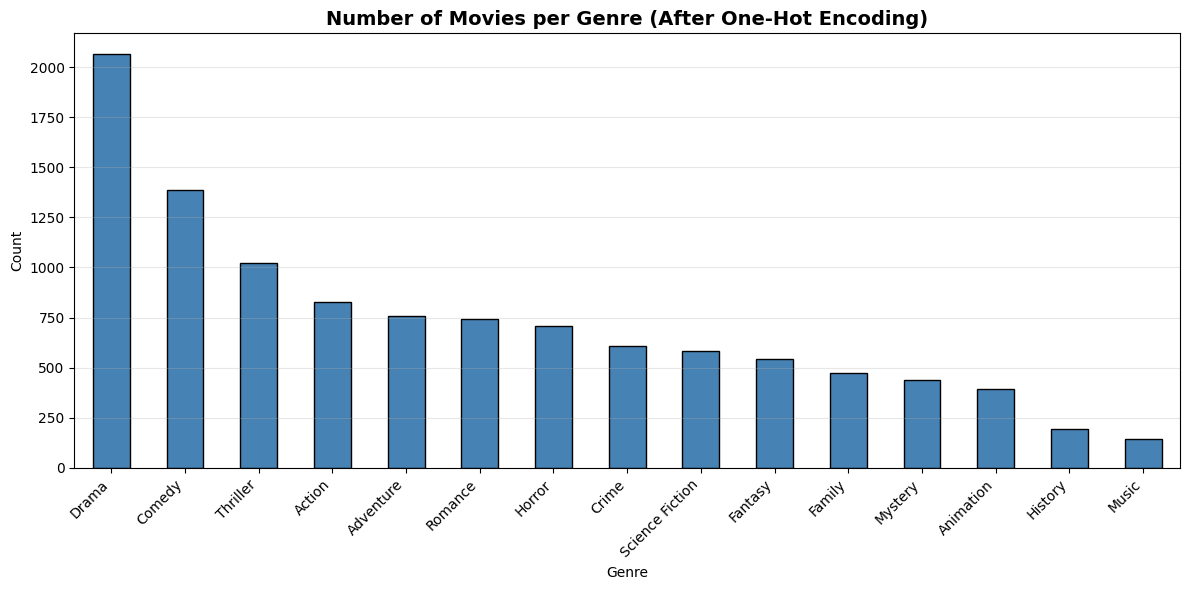

Most common genre: Drama (2065 movies)


In [47]:
genre_counts = genres_df.sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Number of Movies per Genre (After One-Hot Encoding)', fontsize=14, fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"Most common genre: {genre_counts.index[0]} ({genre_counts.iloc[0]} movies)")

## Feature 5: Normalize Numerical Features

**Problem:**  
Different scales confuse ML:

- Rating: 0 – 5  

**Solution:**  
Scale all numerical features to the same 0–1 range using Min-Max normalization.

**Example:**  

Before:  
`rating = 4.5`

After:  
`rating_normalized = 0.90`


In [48]:
scaler = MinMaxScaler()
df["rating_normalized"] = scaler.fit_transform(df[["Rating"]])

print("Normalized numerical features:")
print("\nExample:")
print(f"Original rating: {df['Rating'].iloc[10]} → Normalized: {df['rating_normalized'].iloc[10]:.3f}")

Normalized numerical features:

Example:
Original rating: 3.75 → Normalized: 0.740


## Combine All Features into Final Data 



In [49]:
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import StandardScaler

#folosesc un model ai care imi transforma textul in "embedding vectors" 
model = SentenceTransformer("all-MiniLM-L6-v2")

def build_text(row):
    return (
        f"Title: {row['Title']}. "
        f"Description: {row['Description']}. "
        f"Rating: {row['rating_normalized']}. "
        f"Genres: {', '.join(row['Genres'])}. "
        f"Themes: {', '.join(row['Themes'])}. "
        f"Cast: {', '.join(row['Cast'])}. "
        f"Directors: {', '.join(row['Directors'])}."
    )

df["full_text"] = df.apply(build_text, axis=1) #pentru fiecare film se genereaza un text intreg

emb_matrix = model.encode(df["full_text"].tolist(), convert_to_numpy=True) #se produce un vector numeric

binary_df = pd.concat(
    [genres_df, themes_df, cast_df, directors_df],
    axis=1
)

scaler_bin = StandardScaler()
binary_scaled = scaler_bin.fit_transform(binary_df)

scaler_emb = StandardScaler()
emb_scaled = scaler_emb.fit_transform(emb_matrix)

final_features = np.hstack([
    0.2 * binary_scaled,
    0.8 * emb_scaled
])

emb_dim = emb_matrix.shape[1]

features_df = pd.DataFrame(
    final_features.astype(np.float32),
    columns=list(binary_df.columns) + [f"emb_{i}" for i in range(emb_dim)]
)

print("FINAL feature matrix created!")
print("Shape:", features_df.shape)
features_df.head()


FINAL feature matrix created!
Shape: (4320, 973)


,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,...,emb_374,emb_375,emb_376,emb_377,emb_378,emb_379,emb_380,emb_381,emb_382,emb_383
0,-0.097243,-0.092408,-0.063358,0.290836,-0.080865,-0.024134,0.208999,-0.070046,-0.075753,-0.043368,...,0.079453,-0.180608,0.129252,1.149456,-0.312839,-1.189101,1.145710,0.173029,-0.848964,0.155110
1,-0.097243,0.432861,-0.063358,-0.137535,-0.080865,-0.024134,0.208999,-0.070046,-0.075753,-0.043368,...,0.168396,-0.064254,-0.467980,0.273082,-0.064477,0.085160,0.103610,0.110501,-0.213729,-0.815943
2,-0.097243,0.432861,-0.063358,0.290836,-0.080865,-0.024134,-0.191389,-0.070046,-0.075753,-0.043368,...,-0.196785,0.072852,-0.271095,-0.120093,0.622398,0.969945,-0.068213,-0.717575,0.179057,0.751995
3,-0.097243,-0.092408,-0.063358,-0.137535,-0.080865,-0.024134,0.208999,-0.070046,-0.075753,-0.043368,...,-0.490815,0.899988,-0.254227,0.362420,0.607705,1.161308,-0.487043,-0.143049,-0.371680,-0.885097
4,-0.097243,-0.092408,-0.063358,0.290836,-0.080865,-0.024134,0.208999,-0.070046,-0.075753,-0.043368,...,0.493140,-1.009705,-0.507515,1.658533,1.614177,0.348755,-0.811603,2.002328,-0.096166,-0.036283


In [50]:
features_df.to_csv("../date/processed/movies_features.csv", index=False)
print("Saved: movies_features.csv")

df[["Title", "Description"]].to_csv("../date/processed/movie_titles.csv", index=False)
print("Saved: movie_titles.csv")


print(f"   - {len(df)} movies processed")
print(f"   - {features_df.shape[1]} features created (embeddings + rating)")
print(f"   - Files saved:")
print("       - movies_features.csv")
print("       - movie_titles.csv")

Saved: movies_features.csv
Saved: movie_titles.csv
   - 4320 movies processed
   - 973 features created (embeddings + rating)
   - Files saved:
       - movies_features.csv
       - movie_titles.csv
